# GraphDB(neo4j)

In [1]:
from neo4j import GraphDatabase
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd

## グラフデータベースの接続

In [2]:
# neo4j serverに接続するdriverの設定
driver = GraphDatabase.driver('neo4j://graph-db:7687')

In [3]:
# relationがあるデータを取得する

def fetch_transaction(tx, contract_address):
    query = "MATCH p=()-[r:TRANSFER {contractAddress: $address}]->() RETURN p"
    
    transactions = tx.run(query, address=contract_address)
    return list(transactions)

In [4]:
contract_address = "0xAAa87514287CF537fD600BFFdd2e2d65A3A73C3D"
transactions = list()
relations = list()

# neo4jに接続してトランザクションを実行
with driver.session() as session:
    transactions = session.execute_read(fetch_transaction, contract_address)

# トランザクションの結果をリストに保存
for transaction in transactions:
    path = transaction["p"]
    start_node = path.start_node
    end_node = path.end_node
    relations.append({"from": start_node["address"], "to": end_node["address"]})

# 結果をpandasで保存
df = pd.DataFrame(relations)
display(df)

Empty DataFrame
Columns: []
Index: []

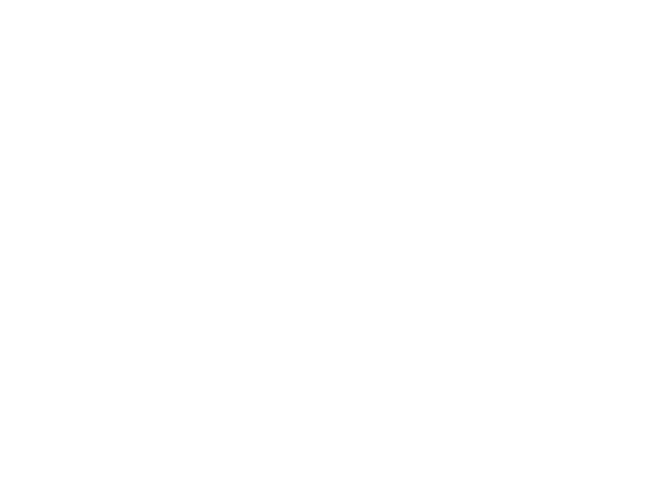

In [5]:
G = nx.DiGraph()

for index, transaction in df.iterrows():
    G.add_edge(transaction["from"], transaction["to"])

nx.draw(G, with_labels=True )

In [6]:
df = pd.DataFrame()

def calc_score(v, name):
    temp = np.zeros(len(G.nodes))
    for key in v:
        temp[list(G.nodes).index(key)] = v[key]
    df[name] = temp

In [7]:
# 次数中心性
v = nx.in_degree_centrality(G)
calc_score(v, "degree")
# 媒介中心性
v = nx.betweenness_centrality(G)
calc_score(v, "betweenness")
# PageRank
v = nx.pagerank(G, max_iter=1000)
calc_score(v, "pagerank")

## 可視化、数値の算出

/tmp/ipykernel_94/117361606.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[["degree", "betweenness", "pagerank"]], labels=["次元中心性", "媒介中心性", "PageRank"])


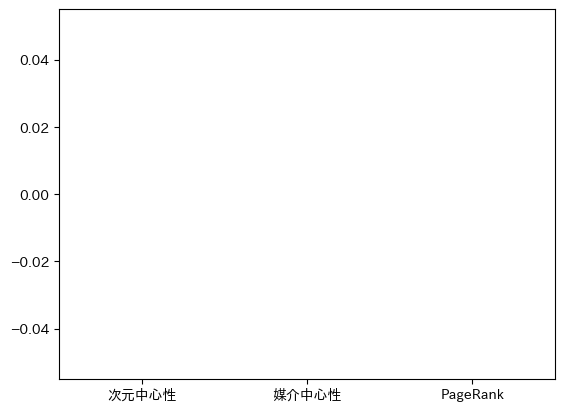

In [8]:
plt.boxplot(df[["degree", "betweenness", "pagerank"]], labels=["次元中心性", "媒介中心性", "PageRank"])
plt.show()

In [9]:
df.head(10)

Empty DataFrame
Columns: [degree, betweenness, pagerank]
Index: []

## データのインポート

In [ ]:
# path = "data/contracts.csv"

# try:
#     # CSVファイルを読み込む
#     df = pd.read_csv(path)
    
#     # ヘッダーを出力する
#     print(df.columns)
# except FileNotFoundError:
#     print("エラー: 指定されたCSVファイルが見つかりません。ファイルのパスを確認してください。")
# except Exception as e:
#     print(f"予期しないエラーが発生しました: {e}")

Index(['from_address', 'to_address'], dtype='object')


In [11]:
# def create_node(tx, addresses, type):
#     for index, address in enumerate(addresses):
#         # データを取得する
#         fetch_query = "MATCH p=(u:User {address: $address}) RETURN p"
#         node = tx.run(fetch_query, address=address)
#         node = list(node)
        
#         # ノードが追加されていなければノードを追加する
#         if len(node) < 1:
#             create_query = "CREATE (u:User {address: $address, type: $type})"
#             node = tx.run(create_query, address=address, type=type)
#             if index % 100 == 0:
#                 print(index, end=", ")
#             with open("data/node.log", mode="a") as f:
#                 f.write(f"{index} node created \n")

#     print("")
#     print(f"saved {type} nodes")
#     return node
        

In [12]:
# def create_relation(tx, df, token_id, contract_address):
#     for index, row in df.iterrows():
#         query = "MATCH (from:User {address: $fromAddress}), (to:User {address: $toAddress}) CREATE (from)-[:TRANSFER {tokenId: $tokenId, contractAddress: $contractAddress}]->(to)"
#         node = tx.run(query, fromAddress=row["from_address"], toAddress=row["to_address"], tokenId=token_id, contractAddress=contract_address)
#         if index % 100 == 0:
#                 print(index, end=", ")
#         with open("data/relation.log", mode="a") as f:
#                 f.write(f"{index} relation created {row["from_address"]} -> {row["to_address"]} \n")
#     print("saved relations")


In [13]:
# contract_address = "csv"
# token_id = 1

# with driver.session() as session:
#     # fromノードの追加
#     node = session.execute_write(create_node, df["from_address"], "from")  

#     # toノードの追加
#     node = session.execute_write(create_node, df["from_address"], "to")

#     # releationの追加
#     node = session.execute_write(create_relation, df, token_id, contract_address)


KeyboardInterrupt: 